In [20]:
import pandas as pd
import json
from pathlib import Path
import csv
import sqlalchemy as sql
from sqlalchemy import create_engine
%matplotlib inline
import numpy as np
import hvplot.pandas

In [21]:
bnb_price_engine = sql.create_engine("sqlite:///bnb_price_data_df.db")

In [22]:
bnb_tweet_count_engine = sql.create_engine("sqlite:///bnb_tweet_count_df.db")

In [23]:
sql_query1 = """SELECT Timestamp, Value FROM BNB_price_data_df1"""
df1 = pd.read_sql(sql_query1, con=bnb_price_engine)
sql_query2 = """SELECT Timestamp, tweet_count FROM BNB_tweet_count_df1"""
df2 = pd.read_sql(sql_query2, con=bnb_tweet_count_engine)

In [24]:
df2.head()

,Timestamp,tweet_count
0,2021-10-02 23:00:00.000000,829
1,2021-10-03 00:00:00.000000,5932
2,2021-10-03 01:00:00.000000,6084
3,2021-10-03 02:00:00.000000,7327
4,2021-10-03 03:00:00.000000,8929


In [25]:
merged_df = pd.merge(df1, df2, how="left")

In [26]:
merged_df.head()

,Timestamp,Value,tweet_count
0,2021-10-02 15:00:00.000000,435.38,NaN
1,2021-10-02 16:00:00.000000,427.40,NaN
2,2021-10-02 17:00:00.000000,424.15,NaN
3,2021-10-02 18:00:00.000000,425.60,NaN
4,2021-10-02 19:00:00.000000,426.80,NaN


In [27]:
merged_df = merged_df.dropna()

In [28]:
merged_df.head()

,Timestamp,Value,tweet_count
8,2021-10-02 23:00:00.000000,433.16,829.0
9,2021-10-03 00:00:00.000000,429.46,5932.0
10,2021-10-03 01:00:00.000000,428.40,6084.0
11,2021-10-03 02:00:00.000000,425.18,7327.0
12,2021-10-03 03:00:00.000000,425.71,8929.0


AttributeError: 'Line2D' object has no property 'y2'

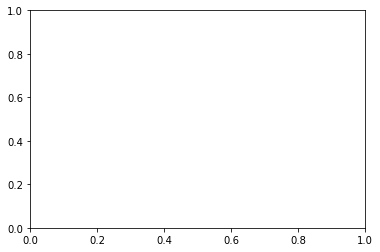

In [104]:
merged_df.plot(y="Value", y2="tweet_count", x="Timestamp", title= "Hourly BTC Price vs. Tweet Count")

In [102]:
merged_df.describe()

,Value,tweet_count
count,163.000000,163.000000
mean,51758.942086,21888.171779
std,2896.508466,6907.328904
min,47309.440000,9134.000000
25%,48932.165000,17007.500000
50%,51559.970000,20521.000000
75%,54555.315000,25319.500000
max,55823.610000,60330.000000
